<a href="https://colab.research.google.com/github/OUAALOUHOUM/Deep-learning-project/blob/main/CNN_UDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* L'apprentissage profond ou apprentissage en profondeur (en anglais : deep learning, deep structured learning, hierarchical learning) est un sous-domaine de l’intelligence artificielle qui utilise des réseaux neuronaux pour résoudre des tâches complexes grâce à des architectures articulées de différentes transformations non linéaires. Ces techniques ont permis des progrès importants et rapides dans les domaines de l'analyse du signal sonore ou visuel et notamment de la reconnaissance faciale, de la reconnaissance vocale, de la vision par ordinateur, du traitement automatisé du langage. .

* Les algorithmes d'apprentissage profond s’opposent aux algorithmes d’apprentissage peu profonds du fait du nombre de transformations réalisées sur les données entre la couche d’entrée et la couche de sortie, où une transformation correspond à une unité de traitement définie par des poids et des seuils.

En d’autres termes, l'algorithme apprend à partir d’exemples de données afin d’être en mesure de produire des résultats précis lorsqu’on lui présente de nouvelles données.

* D'ailleurs, une de ses faiblesses mis à part son temps d'exécution est qu'elle requiert beaucoup de données étiquettées ou labélisées pour bien marcher.

* Pour cette dernière, nous avons l'apprentissage semi-supervised semi supervised learning



Here is an example of how to implement unsupervised data augmentation (UDA) in Keras:

* First, import the necessary libraries:
javascript

In [30]:
import numpy as np 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



* Load the dataset and split it into labeled and unlabeled data:

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
ind2=[]
for i in range(10):
  j=np.where(y_train==i)[0][:10]
  ind2.append(j)
index=np.array(ind2).reshape(1,100)[0]
y_train2=y_train[index]

<Axes: ylabel='Count'>

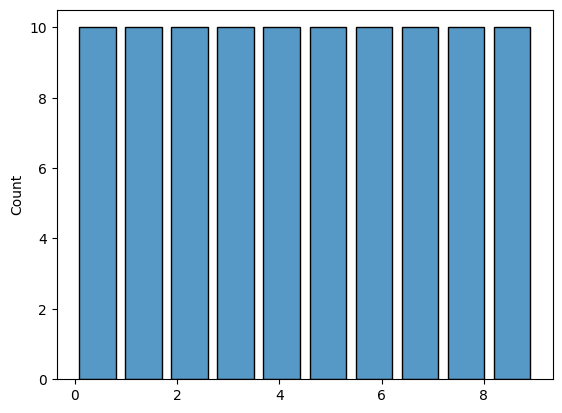

In [5]:
sns.histplot(data=y_train2,shrink=.8,bins=10)

In [6]:
labeled_data = (x_train[index], y_train[index])
unlabeled_data = np.delete(x_train,index,axis=0)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
unlabeled_data.shape

(59900, 28, 28, 1)

* Create an image data generator for data augmentation:

In [9]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest')


* Define a function to apply data augmentation to the unlabeled data:

In [10]:
def augment_data(images):
    aug_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        aug_images[i] = datagen.random_transform(images[i])
    return aug_images


* Define the model architecture:

In [15]:
input_shape=(28,28,1)
num_classes = 10

# Import necessary libraries
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),

    # Dense layers
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)      

* Define the loss function and optimizer:

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()


* Define the training loop:
In this example, we first load the CIFAR-10 dataset and split it into labeled and unlabeled data. We then create an image data generator

In [17]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [18]:
labeled_batch_size = 32
unlabeled_batch_size = 128
num_epochs = 5

for epoch in range(num_epochs):
    # Train on labeled data
    labeled_dataset = tf.data.Dataset.from_tensor_slices(labeled_data)
    labeled_dataset = labeled_dataset.shuffle(len(labeled_data[0]))
    labeled_dataset = labeled_dataset.batch(labeled_batch_size)
    for x, y in labeled_dataset:
        with tf.GradientTape() as tape:
            logits = model(x, training=True)
            #print(y)
            #print(logits)
            loss = loss_fn(y, logits)
            #print(loss)
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
    
    # Train on unlabeled data
    unlabeled_dataset = tf.data.Dataset.from_tensor_slices(unlabeled_data)
    unlabeled_dataset = unlabeled_dataset.shuffle(len(unlabeled_data))
    unlabeled_dataset = unlabeled_dataset.batch(unlabeled_batch_size)
    for x in unlabeled_dataset:
        x_aug = augment_data(x)
        with tf.GradientTape() as tape:
            logits = model(x, training=True)
            logits_aug = model(x_aug, training=True)
            # print(logits_aug)
            # model.predict

            loss = (loss_fn(np.argmax(logits, axis=-1),logits_aug) +
                    loss_fn(np.argmax(logits_aug,axis=-1), logits))
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))


In [ ]:
model.compile(optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)      

In [20]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [21]:
Y_train = convert_to_one_hot(y_train, 10).T
Y_test = convert_to_one_hot(y_test, 10).T

In [23]:
history = model.fit(x_train[index], Y_train[index],validation_data=(x_test,Y_test),epochs = 100, batch_size = 10)

Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 1.8820 - accuracy: 0.4600 - val_loss: 3.2435 - val_accuracy: 0.3787
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 1.6544 - accuracy: 0.5000 - val_loss: 1.9758 - val_accuracy: 0.5466
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 1.4692 - accuracy: 0.6400 - val_loss: 1.7075 - val_accuracy: 0.5983
Epoch 4/100
10/10 [==============================] - 21s 2s/step - loss: 1.3280 - accuracy: 0.5600 - val_loss: 1.5676 - val_accuracy: 0.6233
Epoch 5/100
10/10 [==============================] - 14s 2s/step - loss: 0.7998 - accuracy: 0.7800 - val_loss: 1.4452 - val_accuracy: 0.6396
Epoch 6/100
10/10 [==============================] - 21s 2s/step - loss: 0.8736 - accuracy: 0.6900 - val_loss: 1.7971 - val_accuracy: 0.5747
Epoch 7/100
10/10 [==============================] - 21s 2s/step - loss: 1.1183 - accuracy: 0.7000 - val_loss: 1.3291 - val_accuracy: 0.6674
Epoch 8/100
1

In [26]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 13s 38ms/step - loss: 1.0327 - accuracy: 0.7596


[1.0327376127243042, 0.7595999836921692]

In [27]:
input_shape=(28,28,1)
num_classes = 10
# Create the UDA model
model2 = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),

    # Dense layers
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_10 (Bat  (None, 12, 12, 32)      

In [32]:
history2 = model2.fit(x_train[index], Y_train[index],validation_data=(x_test,Y_test),epochs = 100, batch_size = 10)

Epoch 1/100
10/10 [==============================] - 26s 2s/step - loss: 3.3985 - accuracy: 0.1400 - val_loss: 2.3408 - val_accuracy: 0.1140
Epoch 2/100
10/10 [==============================] - 14s 1s/step - loss: 2.8255 - accuracy: 0.1600 - val_loss: 2.2715 - val_accuracy: 0.2142
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 2.6962 - accuracy: 0.1900 - val_loss: 2.1726 - val_accuracy: 0.2000
Epoch 4/100
10/10 [==============================] - 21s 2s/step - loss: 1.9744 - accuracy: 0.3300 - val_loss: 2.0525 - val_accuracy: 0.2717
Epoch 5/100
10/10 [==============================] - 21s 2s/step - loss: 1.7001 - accuracy: 0.4400 - val_loss: 1.8926 - val_accuracy: 0.3696
Epoch 6/100
10/10 [==============================] - 15s 2s/step - loss: 1.6995 - accuracy: 0.4500 - val_loss: 1.7131 - val_accuracy: 0.4460
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 1.2099 - accuracy: 0.6100 - val_loss: 1.5592 - val_accuracy: 0.5275
Epoch 8/100
1

In [33]:
model2.evaluate(x_test,Y_test)

313/313 [==============================] - 12s 36ms/step - loss: 1.1365 - accuracy: 0.7601


[1.1364943981170654, 0.7601000070571899]

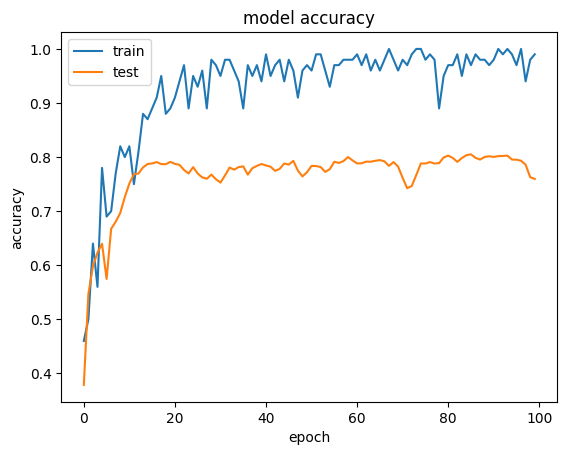

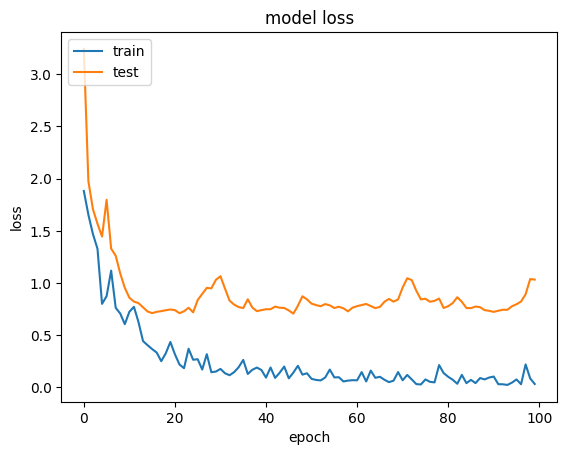

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

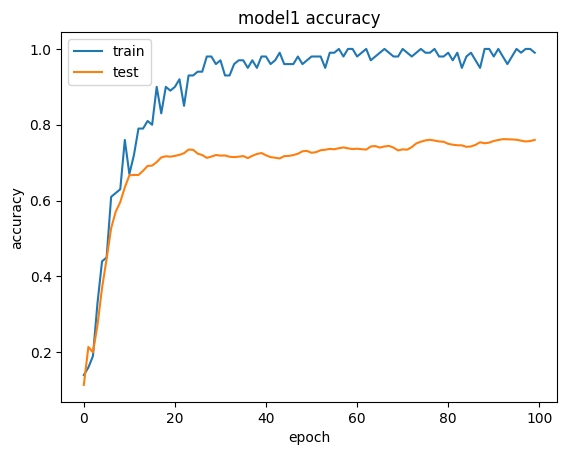

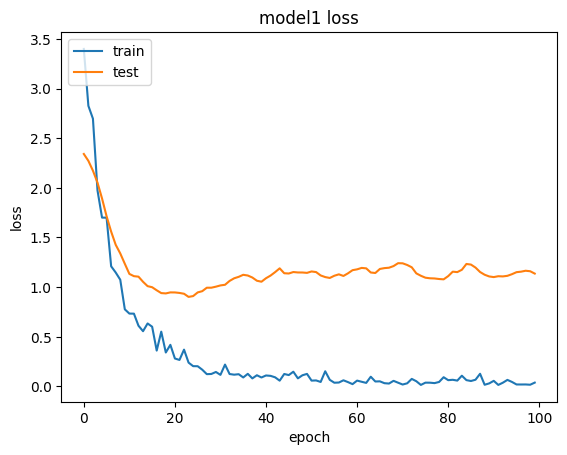

In [34]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1.save("model1.h5")

In [ ]:
model.save("model.h5")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,10))
x_t=augment_data(x_train[:25])
print(x_t.shape,x_train.shape)


(25, 28, 28, 1) (60000, 28, 28, 1)


<Figure size 1000x1000 with 0 Axes>

In [ ]:
class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

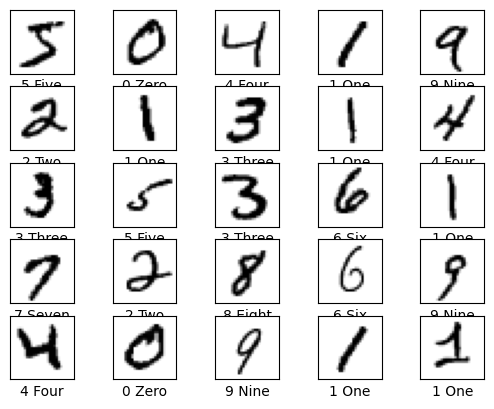

In [ ]:
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i]])) # Assigning name to each image
plt.show()

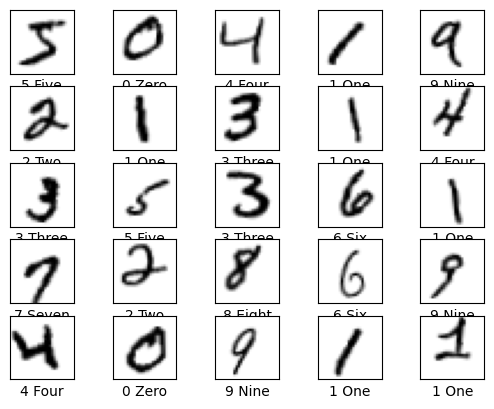

In [ ]:
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_t[i], cmap=plt.cm.binary)
  
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i]])) # Assigning name to each image
plt.show()

In [ ]:
import wide_resnet.py as wrn

In [ ]:
model_wrn = wide_resnet.create_wide_residual_network((28,28,1),nb_classes=10,N=2,k=2)
plot_model(model_wrn)

NameError: ignored